In [5]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from utils.classes import CellImage
from utils.helpers.helpers import get_images, show_images, show_plot_intensity_hists
from utils.helpers.enums import FilterAlg, ContoursDetectingAlg, MorphOperation, EdgesDetectingAlg, Pixel

In [2]:
subfolders = [f.path for f in os.scandir('./cells_images') if f.is_dir()]
folders_with_images = [[CellImage(image) for image in get_images(subfolder, limit=5)] for subfolder in subfolders]
for folder in folders_with_images:
    for image in folder:
        image.delete_description()
subfolders

['./cells_images/27_12_22_ps_v',
 './cells_images/28_12_22_ps_v',
 './cells_images/Provotorova',
 './cells_images/Provotorova_13.12.22']

(487.78570556640625, 882.7738037109375)

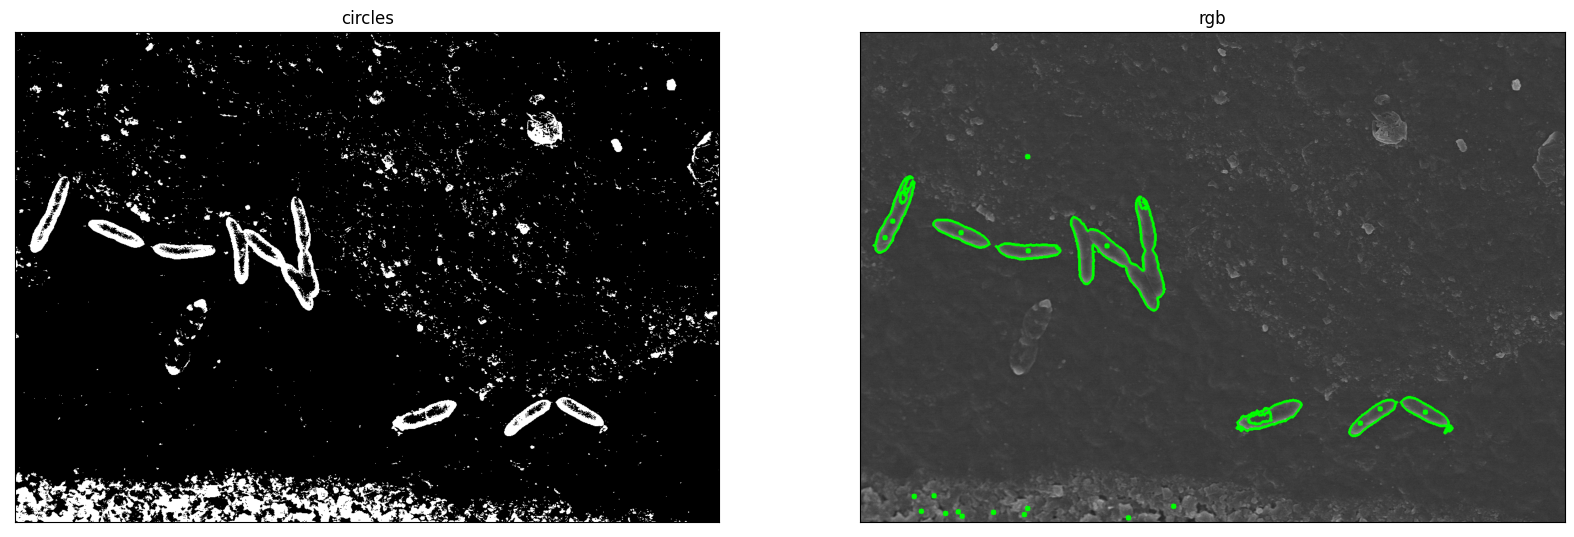

In [54]:
image = copy(folders_with_images[1][1])

params = cv.SimpleBlobDetector_Params()
params.filterByInertia = False 
params.filterByConvexity = True
params.minConvexity = 0.8
params.filterByCircularity = True
params.minCircularity = 0.1

# ------------- contours ----------------
image.detect_contours(alg=ContoursDetectingAlg.OTSU_BINARIZATION)
image_rgb = cv.cvtColor(image.original, cv.COLOR_GRAY2RGB)
contours, hierarchy = cv.findContours(image.src, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours = tuple(
            [contour for contour in contours if cv.contourArea(contour) > 2000 and cv.contourArea(contour) < 15000])
cv.drawContours(image_rgb, contours, -1, (0, 255, 0), 3)

# ----------- circles -----------------
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(image.src)
circles = copy(image_rgb)
for keypoint in keypoints:
    circles = cv.circle(circles, (int(keypoint.pt[0]), int(keypoint.pt[1])), radius=5, color=(0, 255, 0), thickness=-1)

show_images([ 
    (image.src, 'circles'),
    (circles, 'rgb'),
], size_inches=(20, 20), grid=(1, 2))

# res = cv.pointPolygonTest(c, (200, 1000), False) check if point inside contour
keypoints[0].pt

Text(0.5, 0, 'area')

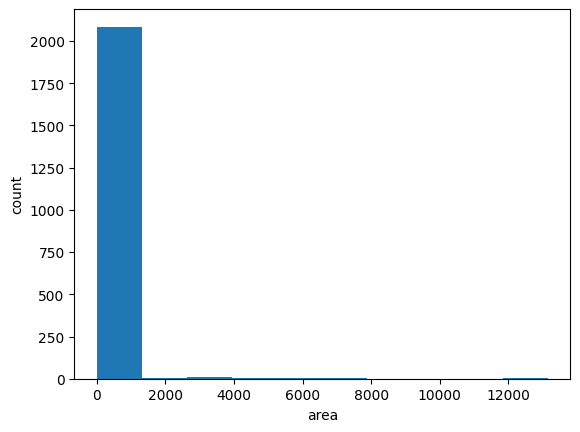

In [21]:
plt.hist([cv.contourArea(contour) for contour in contours])
plt.ylabel('count')
plt.xlabel('area')